# Pymaceuticals Inc.
---

### Analysis

- In this pharmaceutical study by Pymaceuticals, Inc., we are reviewing the effects of four specific drug regimens on mice.
- Ten drugs were used in this study, but only four are used in our report:   Capomulin, Ramicane, Infubinol, and Ceftamin.
- A check for data integrity found there was duplicate data for one mouse so that data was removed, leaving the remaining sample of 248 mice.
- Of the four primary drugs used, Ramicane appears to have had the highest impact on tumor volume with the smallest mean, median, variance, standard deviation, and SEM.
- Of the four primary drugs used, Infubinol appears to have had the lowest impact on tumor volume with the highest mean, median, variance, standard deviation, and SEM.
- Ramican and Capomulin had the highest number of observed timestamps
- The ratio of males to females in the sample was fairly even with 51% males and 49% females.


In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
study_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_count = study_df['Mouse ID'].nunique()
mouse_count

249

In [6]:
#Check and correct data types
study_df["Mouse ID"] = study_df["Mouse ID"].astype("string")
study_df["Drug Regimen"] = study_df["Drug Regimen"].astype("string")
study_df["Sex"] = study_df["Sex"].astype("string")
study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   string 
 1   Drug Regimen        1893 non-null   string 
 2   Sex                 1893 non-null   string 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), string(3)
memory usage: 118.4 KB


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
study_df = study_df.set_index(['Mouse ID', 'Timepoint']).reset_index()
study_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [8]:
study_grouped = study_df.groupby(['Mouse ID', 'Timepoint'])
study_grouped.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [9]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_df[study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(f'The following mice have duplicate entries: {", ".join(duplicate_mice)}.')

The following mice have duplicate entries: g989.


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = study_df[study_df['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
908,g989,0,Propriva,Female,21,26,45.000000,0
909,g989,0,Propriva,Female,21,26,45.000000,0
910,g989,5,Propriva,Female,21,26,48.786801,0
911,g989,5,Propriva,Female,21,26,47.570392,0
912,g989,10,Propriva,Female,21,26,51.745156,0
913,g989,10,Propriva,Female,21,26,49.880528,0
914,g989,15,Propriva,Female,21,26,51.325852,1
915,g989,15,Propriva,Female,21,26,53.442020,0
916,g989,20,Propriva,Female,21,26,55.326122,1
917,g989,20,Propriva,Female,21,26,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = study_df[~study_df['Mouse ID'].isin(duplicate_mice)]
clean_study_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_study_df['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mean = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
summary_median = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
summary_var = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [16]:
summary_std = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
summary_sem = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data1 = {'Mean Tumor Volume': summary_mean,
                'Median Tumor Volume': summary_median,
                'Tumor Volume Variance': summary_var,
                'Tumor Volume Standard Deviation': summary_std,
                'Tumor Volume SEM': summary_sem
}

regimen_summary1 = pd.DataFrame(summary_data1)
regimen_summary1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

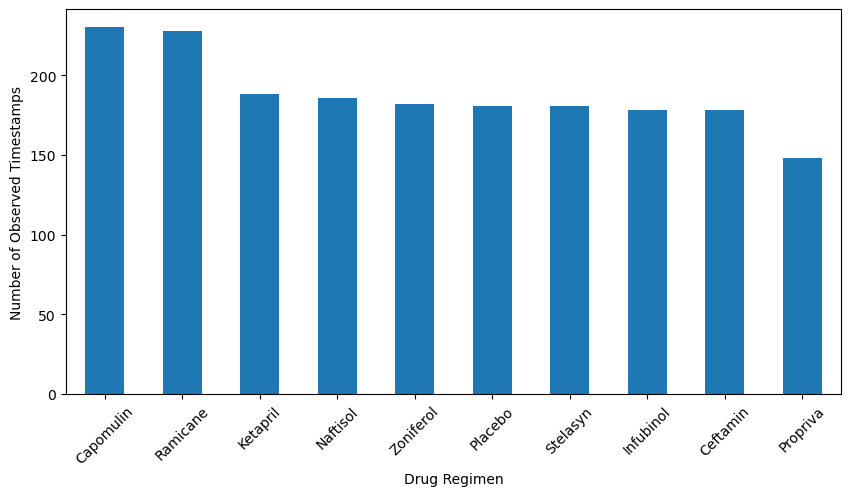

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_study_df['Drug Regimen'].value_counts()
counts.plot(kind='bar', figsize=(10,5), rot=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Timestamps')
plt.show()

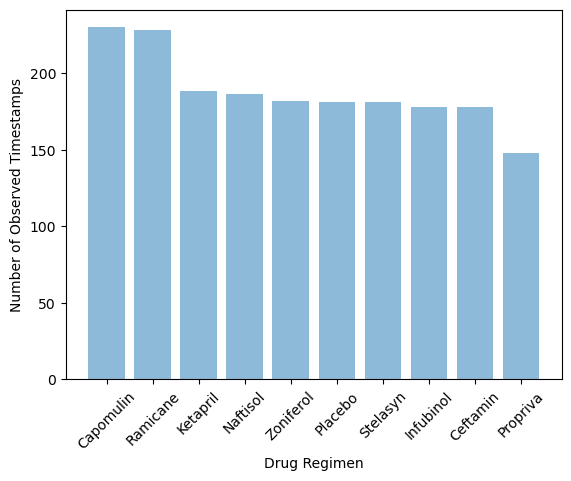

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts.values, alpha=0.5, align='center')
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Timestamps')
plt.show()

Text(0, 0.5, 'Sex')

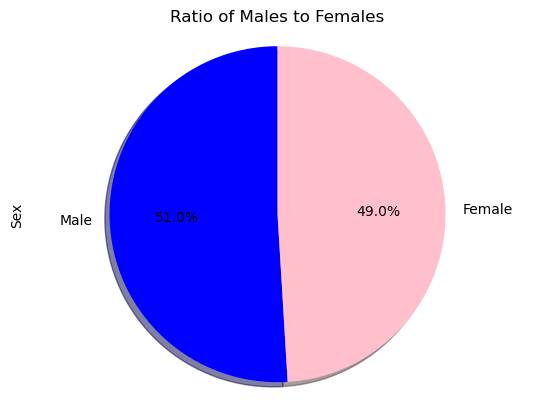

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_stats = clean_study_df['Sex'].value_counts()
colors = ["blue", "pink"]
gender_stats.plot(kind='pie', colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Ratio of Males to Females")
plt.axis("equal")
plt.ylabel('Sex')

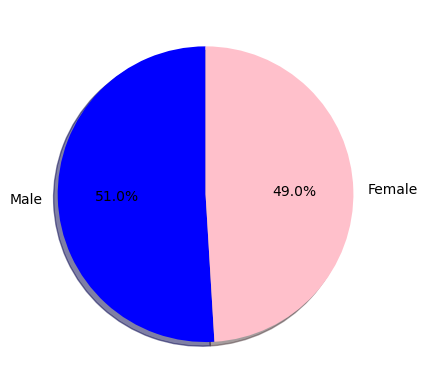

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_stats.values, labels=gender_stats.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume = clean_study_df.loc[clean_study_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
tumor_volume.head(15)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
5,k403,25,Ramicane,Male,21,16,33.464577,1
6,k403,30,Ramicane,Male,21,16,31.099498,1
7,k403,35,Ramicane,Male,21,16,26.546993,1
8,k403,40,Ramicane,Male,21,16,24.365505,1
9,k403,45,Ramicane,Male,21,16,22.050126,1


In [25]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = tumor_volume.groupby('Mouse ID')['Timepoint'].last()
last_timepoint

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint, clean_study_df, how='left', on=["Mouse ID", "Timepoint"])
final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    rows = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment]

    # add subset
    tumor_volumes = rows['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

In [38]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volumes is: 48.72207785
The upper quartile of tumor volumes is: 64.29983003
The interquartile range of tumor volumes is: 15.577752179999997
The the median of tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [29]:
tumor_outliers = final_tumor_vol.loc[(final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
tumor_outliers

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
40,k403,45,Ramicane,Male,21,16,22.050126,1
70,s185,45,Capomulin,Female,3,17,23.343598,1


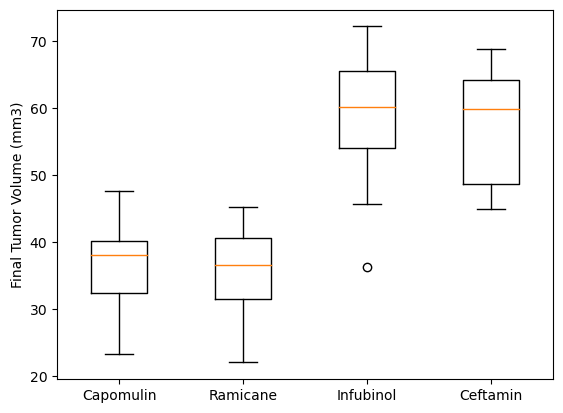

In [30]:
fig1, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

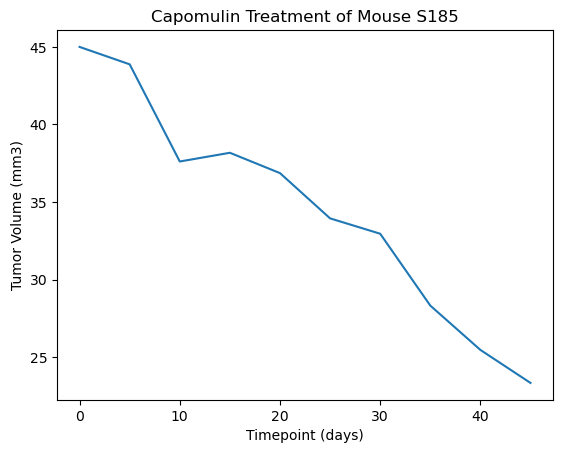

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_study_df[clean_study_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse S185')
plt.show()

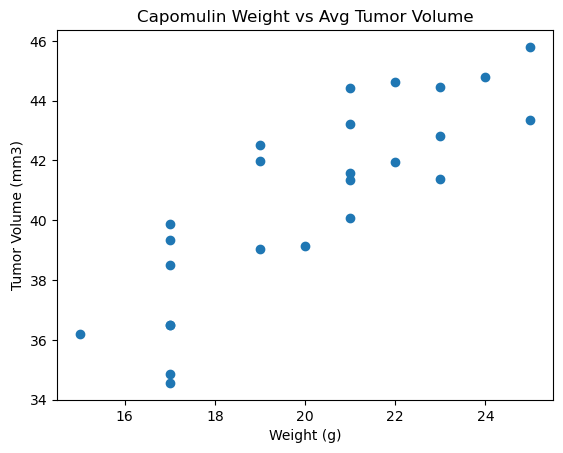

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Weight vs Avg Tumor Volume')
plt.show()

## Correlation and Regression

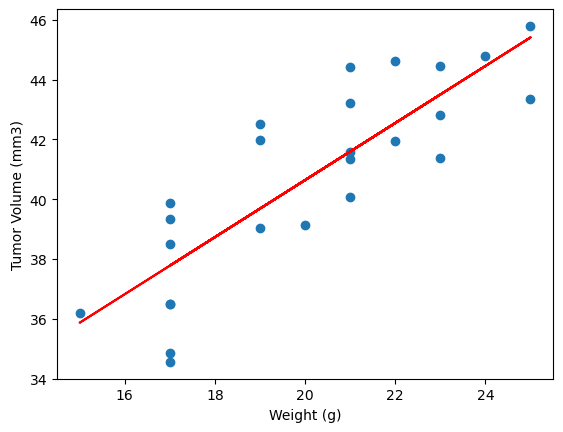

The correlation coefficient between mouse weight and the average tumor volume is 0.84


In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.5, 1), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor_volume)[0],2)}")